# Exercise 1
### 1. Download and compile baby names by state dataset.
The step of compiling datasets will be done in the class defined below.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 

### 2. Create a library class called BabyNames: 

In [125]:
class BabyNames(object):
    
    # a. Class Constructor where you pass the file location to create Pandas DataFrame
    def __init__(self, location):
        names = []
        os.chdir(location)
        for i in os.listdir(os.getcwd()):
            if i.endswith('.TXT'):
                with open(i, 'r') as myfile:
                    names.extend(myfile.read().splitlines())
        # list names is a list with each item being a string of a line from the .txt files
        names2 = []
        for i in range(len(names)):
            names2.append(names[i].split(','))
        # names2 is a list now where each item is a list of string: ['state', 'sex', 'year', 'name', 'births']
        names_final = pd.DataFrame(names2, columns=['State', 'Sex', 'Year', 'Name', 'Births'])
        names_final.Births = pd.to_numeric(names_final.Births)

        self.data = names_final
        # now if you call a BabyNamesObject.data it will return you a pd.DataFrame object where births is 
        # numeric and others are strings
    
    # b. Function Count (state=’’, year=’’): returns the total number of births for a given state & year combination
    def Count(self, state=None, year=None):
        if year:
            year = str(year)
        else:
            pass
        
        if not state and not year:
            num_births = sum(self.data.Births)
        elif not state and not not year:
            num_births = sum(self.data.Births[self.data.Year == year])
        elif not not state and not year:
            num_births = sum(self.data.Births[self.data.State == state])
        else:
            num_births = sum(self.data.Births[(self.data.State == state) & (self.data.Year == year)])
        return num_births
    
    # c. Top10BabyNames(state=’IL’, year=2015)
    def Top10BabyNames(self, state=None, year=None):
        if year:
            year = str(year)
        else:
            pass
        
        male = self.data[self.data.Sex == 'M']
        female = self.data[self.data.Sex == 'F']

        if not state and not year:
            topmale = list(male.groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female.groupby(by='Name').sum().nlargest(10, 'Births').index)
        elif not state and not not year:
            topmale = list(male[male.Year == year].groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female[female.Year == year].groupby(by='Name').sum().nlargest(10, 'Births').index)
        elif not not state and not year:
            topmale = list(male[male.State == state].groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female[female.State == state].groupby(by='Name').sum().nlargest(10, 'Births').index)
        else:
            topmale = list(male[(male.State == state) & (male.Year == year)].groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female[(female.State == state) & (female.Year == year)].groupby(by='Name').sum().nlargest(10, 'Births').index)

        topbaby = pd.DataFrame({'Rank':list(range(1,11)), 'Male': topmale, 'Female':topfemale})
        topbaby = topbaby[['Rank', 'Male','Female']]

        return topbaby
        
    # d. ChangeOfPopularity(fromYear=2014, toYear=2015, top=10): 
    # This function returns a table w/ 3 columns showing changes in popularity of names over the given time period 
    # column (i) shows baby names that increased in popularity in the given time period
    # column (ii) shows baby names that increased in popularity in the given time period
    # column (iii) shows baby names that stayed the same in popularity in the given time period
    def ChangeOfPopularity(self, fromYear=1910, toYear=2017, top=10):
        fromYear = fromYear if fromYear <=2017 and fromYear >=1910 else 1910 
        toYear = toYear if toYear <=2017 and toYear >=1910 else 2017 
        df = self.data[(self.data.Year == str(fromYear))|(self.data.Year == str(toYear))]
        
        def count_in_year(df, name, year):
            df = df[(df.Year == str(year))&(df.Name==name)]
            count = 0
            for index, row in df.iterrows():
                count += int(row['Births'])
            return count
        
        increase_list = []
        decrease_list = []
        nochange_list = []

        for name in df.Name:
            if count_in_year(df, name, toYear) - count_in_year(df, name, fromYear) > 20:
                increase_list.append(name)
            elif count_in_year(df, name, fromYear) - count_in_year(df, name, toYear) > 20:
                decrease_list.append(name)
            else:
                nochange_list.append(name)  
        
        l_inc,l_dec,l_noch = len(increase_list),len(decrease_list),len(nochange_list)
        max_len = max([l_inc,l_dec,l_noch])
        increase_list.extend(['']*(max_len-l_inc))
        decrease_list.extend(['']*(max_len-l_dec))
        nochange_list.extend(['']*(max_len-l_noch))
        lists_for_final = [increase_list, decrease_list, nochange_list]

        return pd.DataFrame({"Increased Over Time Period" : increase_list,
              "Decreased Over Time Period" : decrease_list,
              "No Change Over Time Period" : nochange_list})      
    
    #e. Top5NamesPerYear(year=2015,sex=’’): Returns a table that show the five most
    # frequent given names, by State, for male, female, or both in a given year.
    # The number to the right of each name is the number of occurrences in the data.
    def Top5NamesPerYear(self, year=1910, sex='M'):
        df = self.data[self.data.Year == str(year)]
        
        final_dict = {}
        for State in df.State.unique():
            if sex == 'M':
                df_new = df[(df.State==State)&(df.Sex=='M')].sort_values('Births',ascending=False).head(5)
                final_dict[State] = [(row['Name'],row['Births']) for index,row in df_new.iterrows()]
            elif sex == 'F':
                df_new = df[(df.State==State)&(df.Sex=='F')].sort_values('Births',ascending=False).head(5)
                final_dict[State] = [(row['Name'],row['Births']) for index,row in df_new.iterrows()]
            else:
                df_new = df[df.State==State].sort_values('Births',ascending=False).head(5)
                final_dict[State] = [(row['Name'],row['Births']) for index,row in df_new.iterrows()]
            final_df = pd.DataFrame([[key, final_dict[key][0][0], final_dict[key][0][1],\
                                          final_dict[key][1][0], final_dict[key][1][1],\
                                          final_dict[key][2][0], final_dict[key][2][1],\
                                          final_dict[key][3][0], final_dict[key][3][1],\
                                          final_dict[key][4][0], final_dict[key][4][1],\
                                          ] for key in final_dict], columns=['State','Rank 1','Count','Rank 2','Count','Rank 3','Count',\
                                                                             'Rank 4','Count','Rank 5','Count'])
        return final_df 
    
    
    #f. This function NamePopularityPlot will create a plot file that shows the name popularity changes over the time range.
    # (popularity is based on the proportional use of the name within a state and year)
    def NamePopularityPlot(self, name, yearRange, state='', sex=''):
        yearRange = [*range(yearRange[0],yearRange[1]+1,1)]
        yearRange = [str(year) for year in yearRange]
        df = self.data[self.data.Year.isin(yearRange)]
        df = df[df.Name == name]
        if sex == 'M':
            df = df[df.Sex == 'M']
        elif sex =='F':
            df = df[df.Sex == 'F']
        if state != '':
            df = df[df.State == state]
        df = df[df.Births >= 5]
        total_dict = {}
        for year in yearRange:
            total_dict[year] = df.Births[df.Year==year].sum()
        prop_dict = {}
        for index, row in df.iterrows():
            prop_dict[row['Year']] = round(row['Births']/total_dict[row['Year']]*1000, 3)
        
        plt.scatter([*prop_dict.keys()],[*prop_dict.values()])
        plt.plot([*prop_dict.keys()],[*prop_dict.values()])
        plt.title('Popularity of {} from {} - {}'.format(name,yearRange[0],yearRange[-1]))
        plt.ylabel('Popularity of Name (10ths of a %)')
        plt.xlabel('Year')
        plt.xticks(rotation=65)
        plt.show()
    
    #g. This function Lists the top n names that flipped over the years.
    #(i.e. from boy name to girl or the reverse). 
    # It also Provides a plot of the names showing the year.
    def NameFlip(self, n=10):
        df = self.data.drop(columns='State')
        df = df.groupby(['Name', 'Year', 'Sex'], as_index=False).sum()
        df = df[df.Births >= 50]
        yearRange = [*range(1910,2011,5)]
        yearRange = [str(year) for year in yearRange]
        df = df[df.Year.isin(yearRange)]
        
        def m_or_f(df, name, year):
            df = df[df.Name == name]
            df = df[df.Year == str(year)]
            m_count = df[df.Sex == 'M'].shape[0]
            f_count = df[df.Sex == 'F'].shape[0]
            if m_count >= f_count:
                return 'M'
            else:
                return 'F'
            
        def did_you_flip(name, list_of_year_sex):
            F_count = 0
            M_count = 0
            for tup in list_of_year_sex:
                if tup[1] == 'F':
                    F_count+=1 
                else:
                    M_count+=1 
            if F_count > 0 and M_count >0:
                return True
        
        names_gender_dict = {}
        for name in df.Name.unique():
            name_df = df[df.Name==name]
            names_gender_dict[name] = []
            for index, row in name_df.iterrows():
                names_gender_dict[name].append((row['Year'], m_or_f(df, name, row['Year'])))
        names_that_flipped = []
        for key in names_gender_dict:
            if did_you_flip(key, names_gender_dict[key]) == True: 
                names_that_flipped.append(key)
        names_that_flipped = names_that_flipped[:n]
        print(names_that_flipped)
        lw = 14
        for name in names_that_flipped:
            x = []
            y = []
            for tup in names_gender_dict[name]:
                x.append(tup[0])
                y.append(tup[1])
            plt.plot(x,y,linewidth=lw)
            plt.scatter(x,y)
            lw-=3
        plt.title('Names that Flipped from Male to Female')
        plt.ylabel('Gender')
        plt.xlabel('Year')
        plt.xticks(rotation=65)
        plt.show()  
        
    def Story(self):
        df = self.data
        df = df.groupby(['Name', 'Year'], as_index=False).sum()
        total_births = df.Births.sum()
        df = df[df.Name == 'Luke']
        df.Year = pd.to_numeric(df.Year)
        df['Popularity'] = df['Births']/total_births*100
        ax = df.plot(title='Popularity (% of overall births) of "Luke" by Year',x='Year', y='Popularity')
        ax.axvline(1977, color='r')
        ax.axvline(1980, color='r')
        ax.axvline(1983, color='r')
        
        df2 = self.data
        df2 = df2.groupby(['Name', 'Year'], as_index=False).sum()
        df2 = df2[df2.Name == 'Anakin']
        df2.Year = pd.to_numeric(df2.Year)
        df2['Popularity'] = df2['Births']/total_births*100
        ax2 = df2.plot(title='Popularity (% of overall births) of "Anakin" by Year',x='Year', y='Popularity')
        ax2.axvline(1999, color='r')
        ax2.axvline(2002, color='r')
        ax2.axvline(2005, color='r')
        
        df3 = self.data
        df3 = df3.groupby(['Name', 'Year'], as_index=False).sum()
        df3 = df3[df3.Name == 'Rey']
        df3.Year = pd.to_numeric(df3.Year)
        df3['Popularity'] = df3['Births']/total_births*100
        ax3 = df3.plot(title='Popularity (% of overall births) of "Rey" by Year',x='Year', y='Popularity')
        ax3.axvline(2015, color='r')
        ax3.axvline(2017, color='r')

In [126]:
BabyNamesObject_Sample = BabyNames('/nfs/home/naf445/z/422 Java & Python/Projects/Project1 Personal/NamesByStateSample')
BabyNamesObject = BabyNames('/nfs/home/naf445/z/422 Java & Python/Projects/Project1 Personal/NamesByState')

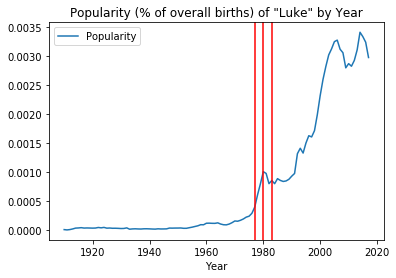

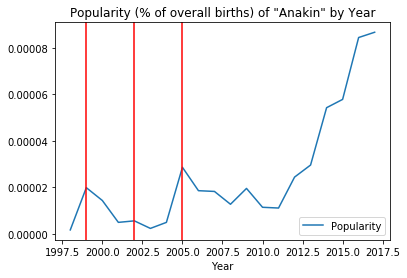

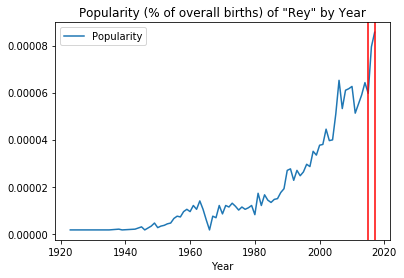

In [127]:
BabyNamesObject.Story()

In [97]:
df_sample = pd.DataFrame([['AL','M','1956','Kevin',14],['AL','M','1956','Kevin',100],['TN','M','1956','Josiah',54],['CA','M','1966','Tyrany',545],['AL','F','2010','NateFranks',1]], columns=['State', 'Sex', 'Year', 'Name', 'Births'])

  State Sex  Year        Name  Births
0    AL   M  1956       Kevin      14
1    AL   M  1956       Kevin     100
2    TN   M  1956      Josiah      54
3    CA   M  1966      Tyrany     545
4    AL   F  2010  NateFranks       1
  State Sex  Year        Name  Births     Hi
0    AL   M  1956       Kevin      14    2.8
1    AL   M  1956       Kevin     100   20.0
2    TN   M  1956      Josiah      54   10.8
3    CA   M  1966      Tyrany     545  109.0
4    AL   F  2010  NateFranks       1    0.2


# Exercise 2

In [ ]:
import pymysql
import pandas as pd


cnx = pymysql.connect("localhost","MSiA422","MSIA422","world" )


city = pd.read_sql_query('select * from city', con=cnx)
country = pd.read_sql_query('select * from country', con=cnx)
countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx)


## Query 1

select * 
<br>from country
<br>where population > 50000000
<br>order by population DESC limit 10;

**Desciption:**
<br>This statement returns top 10 countries with greatest population whose population is greater than 50000000.

In [ ]:
country[country.Population>50000000].sort_values(by='Population', ascending=False).head(10)


Compare results with SQL statement.

In [ ]:
sql = 'select * \
       from country \
       where population > 50000000 \
       order by population DESC limit 10'

pd.read_sql_query(sql, con=cnx)

## Query 2 

select Continent, count(*) As Number_Countries, sum(population) As Population 
<br>from country
<br>where population > 0
<br>group by Continent
<br>order by 1 ASC;

**Desciption:**
<br>This statement only keeps countries with positive population, and then returns the name of each continent, the number of countries and the total population in each continent. In the end the result is sorted by continent name alphabetically. 

In [ ]:
country[country.Population>0].groupby(by = 'Continent').agg({'Name':'count','Population':'sum'}).rename(columns={'Name':'Number_Countries'})


Compare results with SQL statement.

In [ ]:
sql = 'select Continent, count(*) As Number_Countries, sum(population) As Population from country \
       where population > 0 \
       group by Continent \
       order by 1 ASC' 

pd.read_sql_query(sql, con=cnx)

## Query 3
select city.Name As City, city.population
<br>from city
<br>inner join country ON city.CountryCode = country.code
<br>where country.code = 'USA'
<br>order by city.population DESC limit 10

**Desciption:**
<br>This statement selects top 10 cities with greatest population in USA.

In [ ]:
df_city_country = pd.merge(city, country, how='inner', left_on='CountryCode', right_on='Code')
df_city_country[['Name_x','Population_x']][df_city_country.Code=='USA'].sort_values(by='Population_x', ascending=False).rename(columns={'Name_x':'City','Population_x':'Population'}).head(10)


Compare results with SQL statement.

In [ ]:
sql = 'select city.Name As City, city.population \
       from city \
       inner join country ON city.CountryCode = country.code \
       where country.code = "USA" \
       order by city.population DESC limit 10' 

pd.read_sql_query(sql, con=cnx)

## Query 4
select country.Name, Language, (Percentage * population) / 100
<br>from countrylanguage
<br>inner join country on countrylanguage.CountryCode = country.code
<br>where IsOfficial = True
<br>order by 3 DESC limit 10;

**Description:**
<br>This statement firstly returns official language for each country and corresponding amount of population who speaks that language. Then it selects top 10 countries with largest amount of population speaking their official language.

In [ ]:
df_country_lang = pd.merge(countrylanguage, country, how='inner', left_on='CountryCode', right_on='Code')
df_country_lang['Amount'] = df_country_lang.Percentage * df_country_lang.Population / 100
df_country_lang[['Name','Language','Amount']][df_country_lang.IsOfficial=='T'].sort_values(by='Amount', ascending=False).head(10)


Compare results with SQL statement.

In [ ]:
sql = 'select country.Name, Language, (Percentage * population) / 100 \
       from countrylanguage \
       inner join country on countrylanguage.CountryCode = country.code \
       where IsOfficial = True \
       order by 3 DESC limit 10' 

pd.read_sql_query(sql, con=cnx)

## Query 5

select Language, sum((Percentage * population) / 100)
<br>from countrylanguage
<br>inner join country ON countrylanguage.CountryCode = country.code
<br>group by Language
<br>order by 2 desc limit 5;

**Description:**
<br>This statement checks the total amount of population for each language and then selects top 5 languages with largest amount of population speaking their official language.

In [ ]:
df_country_lang.groupby(by='Language').agg({'Amount':'sum'}).sort_values(by='Amount', ascending=False).head(5)


Compare results with SQL statement.

In [ ]:
sql = 'select Language, sum((Percentage * population) / 100) \
       from countrylanguage \
       inner join country ON countrylanguage.CountryCode = country.code \
       group by Language \
       order by 2 desc limit 5' 

pd.read_sql_query(sql, con=cnx)